<a href="https://colab.research.google.com/github/Shyams728/machine_learning_projects/blob/main/Kannada_MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kannda MNIST Classification project Description:


> The project aims to perform multi-class classification on handwritten digits from the Kannada MNIST dataset using various classification algorithms such as PCA, including different numbers of PCA components such as 10, 20, 30, etc. Additionally, it will utilize classification algorithms such as Decision Tree Classifier, Random Forest Classifier, K-Nearest Neighbors Classifier, and Support Vector Machine Classifier. The goal is to analyze metrics like accuracy, precision, recall, and F1 score for each algorithm. Furthermore, the project will display the confusion matrix and the ROC curve.




# Kannda MNIST Classification Project

## Kannda MNIST Classification Exploration

#### Install required packages

In [ ]:
!pip install streamlit pyngrok mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

### Understand the dataset


#### Load the Kannada MNIST dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

# Load training data
X_train = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")["arr_0"]
y_train = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")["arr_0"]

# Load testing data
X_test = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz")["arr_0"]
y_test = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz")["arr_0"]


- `np.load("file_path")`: This function call loads the data stored in the NPZ file located at the specified path.


- `["arr_0"]`: This indexing operation retrieves the data associated with the key "arr_0" from the NPZ file.

#### Size of data & label

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

The Kannada MNIST datasets have been successfully loaded. For training, we have 60,000 image samples, each of size 28x28 pixels representing the handwritten numerals. Similarly, the test dataset contains 10,000 samples of the same dimension. Both the training and test datasets are complemented with their respective labels.

#### Sample image view

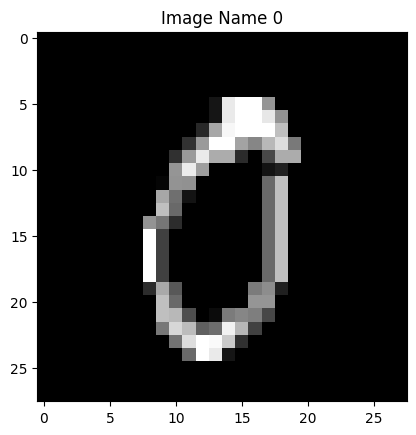

In [ ]:
import matplotlib.pyplot as plt
#sample image
selected_index = 0  # @param {type: "number"}

#show image from training data
plt.imshow(X_train[selected_index], cmap='gray')
plt.title(f'Image Name {y_train[selected_index]}')
plt.show()

In [ ]:
# Check the range of pixel intensity values
min_intensity = np.min(X_train[selected_index])
max_intensity = np.max(X_train[selected_index])

images_below_threshold = np.where(X_train[:] < min_intensity)[0]
images_above_threshold = np.where(X_train[:] > max_intensity)[0]


print("Minimum Pixel Intensity:", min_intensity)
print("Maximum Pixel Intensity:", max_intensity)

print("Number of images with pixel intensity below threshold:", len(images_below_threshold))
print("Number of images with pixel intensity above threshold:", len(images_above_threshold))

Minimum Pixel Intensity: 0
Maximum Pixel Intensity: 255
Number of images with pixel intensity below threshold: 0
Number of images with pixel intensity above threshold: 0


- **Pixel Intensity Values**: As grayscale images, each pixel in an MNIST image has an intensity value ranging from 0 to 255. A pixel with a value of 0 represents black, while a pixel with a value of 255 represents white. The values in between represent various shades of gray
_means higher the value more the shade of gray_

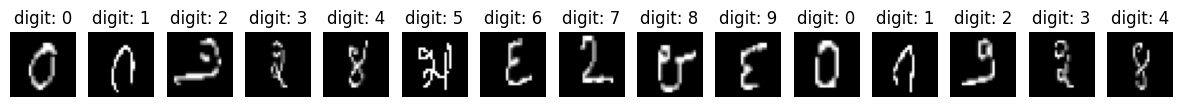

In [ ]:
# Display the first few images side by side
num_images_to_display = 15  # @param {type: "slider", min: 4, max: 20}

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f'digit: {y_train[i]}')
    axes[i].axis('off')

plt.show()

In [ ]:
labels = np.unique(y_train)
print('Unique labels:', labels)

Unique labels: [0 1 2 3 4 5 6 7 8 9]


- **Labeling**: Each image in the dataset is associated with a label indicating the digit it represents. The labels range from 0 to 9, corresponding to the digits 0 through 9.

### Pre Process the dataset

#### Flattenig of image
- When the data is flattened, each image is converted from a 28x28 matrix into a 1D array of length 784 (28*28). As a result, each image becomes a single row in the dataset, and each pixel in the image becomes a feature.

In [ ]:
# Flatten the image data
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

X_train_reshaped.shape, X_test_reshaped.shape

((60000, 784), (10000, 784))

- By flattening the data before splitting it into training and testing sets, we ensure that each sample in the dataset has the same number of features. This allows us to use the train-test split function from scikit-learn without encountering any compatibility issues.

#### Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
# For experimental process taking some sample data and working on that
# X_train, X_test, y_train, y_test = train_test_split(X_train_reshaped[:5000], y_train[:5000], test_size=0.2, random_state=42)

- here test size is 20% of the dataset and random state is 42.

- random state is used to ensure that the same dataset is used for training and testing in the same run.

#### Standardize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Standardize the data
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train_reshaped)
X_test_std = scaler.transform(X_test_reshaped)

- For the MNIST dataset, which contains pixel intensity values ranging from 0 to 255,
- MinMaxScaler might be more suitable as it scales the features to a fixed range (0 to 1), which could help some algorithms converge faster or perform better


`Decision Trees` and `Random Forests` are generally _not affected by scaling or PCA._ Naive Bayes is not significantly affected either. However, **K-NN and SVM benefit from MinMax scaling** to ensure equal contribution of features to the model and to improve the performance of distance-based calculations.

#### PCA

PCA is a dimensionality reduction technique that reduces the dimensionality of the data by projecting it onto a new set of axes that are orthogonal (uncorrelated) and are arranged in descending order of importance or variance.

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=60)  # Reduce to 60 components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
evr = pca.explained_variance_ratio_
evr_total_percentage = sum(evr)* 100

# Check the total explained variance
print(evr)

[0.07972014 0.05570953 0.04466574 0.03657963 0.03445812 0.02782321
 0.02437045 0.02091759 0.02036116 0.01722772 0.01618737 0.01441434
 0.01374545 0.01208958 0.01180921 0.01124604 0.01074275 0.0105848
 0.01019619 0.01007912 0.00943792 0.00919279 0.00857139 0.00841034
 0.00815745 0.00799265 0.00778289 0.0073699  0.00718488 0.00698595
 0.00670051 0.00667533 0.0065641  0.00637729 0.00616206 0.00599458
 0.00577503 0.00565427 0.00547381 0.00529018 0.00514869 0.00502572
 0.00489616 0.00489259 0.00477475 0.0046502  0.00454957 0.00452693
 0.00443155 0.00431753 0.00423658 0.00417459 0.00415535 0.00408563
 0.00405348 0.00384037 0.00376381 0.00367887 0.00362042 0.00352546]


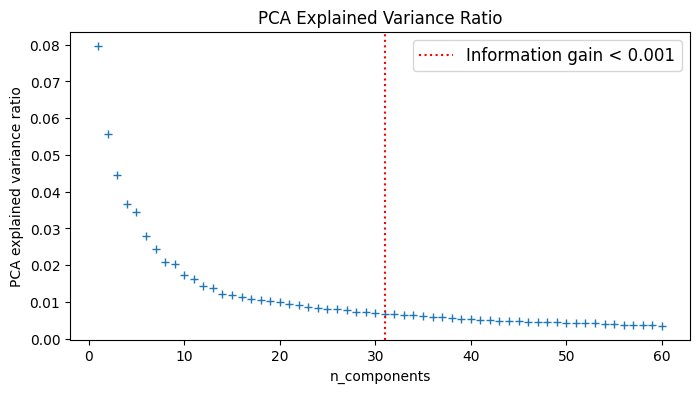

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
plt.figure(figsize=(8, 4))
ax = plt.gca()  # Get the current axes object

# Plot the explained variance ratio
ax.plot(np.arange(1, pca.n_components_ + 1), evr, "+", linewidth=2)
ax.set_ylabel("PCA explained variance ratio")  # Set the y-label using the axes object
ax.set_xlabel("n_components")
ax.set_title("PCA Explained Variance Ratio")
# Check if the information gain of the next variance ratio point is less than 0.001
# and draw a vertical line at that point
for i in range(pca.n_components_ - 1):
    if evr[i] - evr[i + 1] < 0.0001:
        ax.axvline(
            i + 1,  # +1 because we want to start from 1, not 0
            linestyle=":",
            label="Information gain < 0.001",
            color='red'
        )
        break


# Add a legend
ax.legend(prop=dict(size=12))

# Show the plot
plt.show()

Each value in the array represents the proportion of variance explained by the corresponding principal component. Typically, we would use this information to understand how much of the total variance in the data is captured by each principal component. It helps in deciding how many principal components to retain for dimensionality reduction or feature extraction purposes

##### Visualization

###### 2D

In [ ]:
import plotly.express as px
fig = px.scatter(X_train_pca, x=0, y=1, color= y_train)
fig.update_layout(width=700, height=700)
fig.update_layout(title='PCA Visualization of Kannada MNIST Dataset',
                  xaxis_title='First Principal Component',
                  yaxis_title='Second Principal Component')
fig.show()

###### 3D

In [ ]:

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    X_train_pca, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'First PC', '1': 'Second PC', '2': 'Third PC'},
)
fig.update_layout( width = 700, height=700)
fig.show()

- dimensionality reduction technique that is often used to simplify the complexity in high-dimensional data while retaining trends and patterns

### Training the Model

#### Random Forest Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the RandomForestClassifier on the transformed data
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)


RandomForestClassifier()

####Evaluating the Model

In [ ]:
# Evaluate the model on train data
y_train_pred = model.predict(X_train_pca)
y_train_prob = model.predict_proba(X_train_pca)


In [ ]:
# Evaluate the model on test data
y_pred = model.predict(X_test_pca)
y_prob = model.predict_proba(X_test_pca)

In [ ]:
print('sample of predicted labels:',y_pred[0:10])
print('sample of real labels:',y_test[0:10])

sample of predicted labels: [0 1 2 3 4 5 6 7 8 9]
sample of real labels: [0 1 2 3 4 5 6 7 8 9]


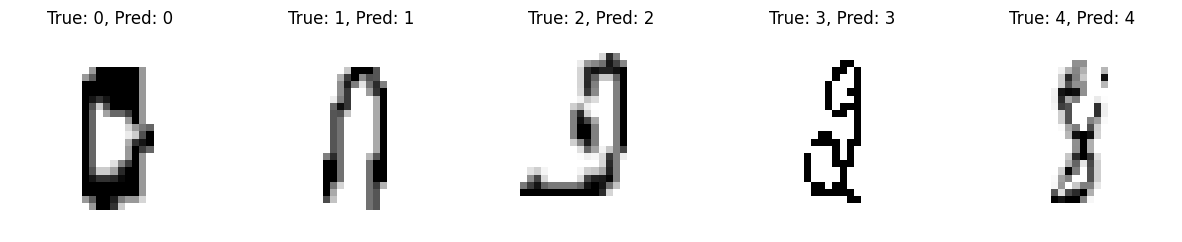

In [ ]:
import matplotlib.pyplot as plt
# Visualize the prediction for a few test samples
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for ax, image, prediction, label in zip(axes, X_test, y_pred, y_test):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"True: {label}, Pred: {prediction}")

performance metrics for train data

##### Calculate Accuracy, Precision, Recall, and F1 Score

In [ ]:

accuarate_samples = np.sum(y_pred == y_test)
total_samples = len(y_test)

# Calculate the accuracy
accuracy = accuarate_samples / total_samples

print(f'Number of accurate samples: {accuarate_samples}')
print(f'Number of total samples: {total_samples}')

print("Accuracy:", accuracy)

Number of accurate samples: 9051
Number of total samples: 10000
Accuracy: 0.9051


In [ ]:
# True Positives (TP):
TP = np.sum((y_test == 1) & (y_pred == 1))
# True Negatives (TN):
TN = np.sum((y_test == 0) & (y_pred == 0))
# False Positives (FP):
FP = np.sum((y_test == 0) & (y_pred == 1))
# False Negatives (FN):
FN = np.sum((y_test == 1) & (y_pred == 0))

# Precision: TP / (TP + FP)
precision = TP / (TP + FP) if TP + FP > 0 else 0

# Recall: TP / (TP + FN)
recall = TP / (TP + FN) if TP + FN > 0 else 0

# F1 Score: 2 * (precision * recall) / (precision + recall)
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  0.8628884826325411
Recall:  0.989517819706499
F1 Score:  0.921875


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
accuracy = accuracy_score(y_train, y_train_pred)
#averaging the score of each class without considering class imbalence
precision = precision_score(y_train, y_train_pred, average='macro')
recall = recall_score(y_train, y_train_pred, average='macro')
f1_score_ = f1_score(y_train, y_train_pred, average='macro')
roc_auc = roc_auc_score(y_train, y_train_prob, multi_class="ovr", average="macro")
report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", report)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



##### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[803, 150,   2,  17,   4,   0,   2,   2,  16,   4],
       [ 10, 944,   1,  19,   6,   1,   0,   0,  12,   7],
       [  5,   0, 984,   2,   0,   7,   1,   0,   1,   0],
       [ 10,   7,   1, 929,  14,  18,   2,  17,   2,   0],
       [  0,   0,   0,  24, 934,  20,   4,   3,   9,   6],
       [  0,   1,   0,   9,  89, 885,   2,   5,   5,   4],
       [  4,   5,   4,  22,  16,  17, 899,  14,   2,  17],
       [  7,   6,   0,  30,  21,   3, 105, 780,   6,  42],
       [ 21,   3,   1,   1,   3,   3,   0,   0, 967,   1],
       [  5,   5,   0,   0,  11,   0,   7,   4,  42, 926]])

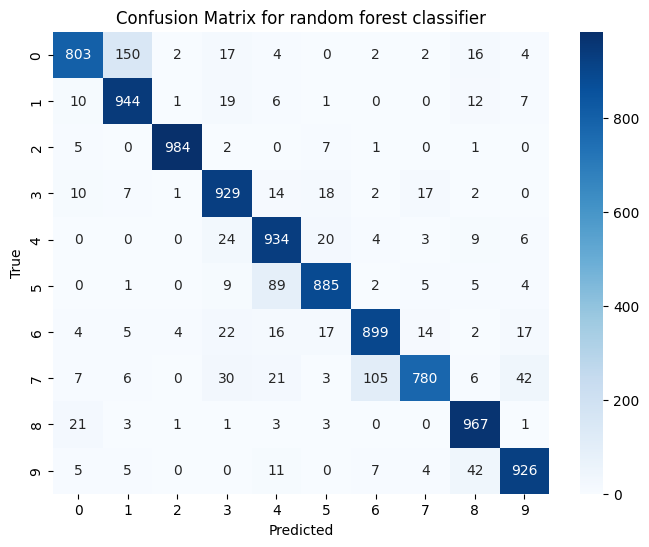

In [ ]:
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt="g", cmap="Blues",
    xticklabels=np.unique(y_test), yticklabels=np.unique(y_test)
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix for random forest classifier")
plt.show()

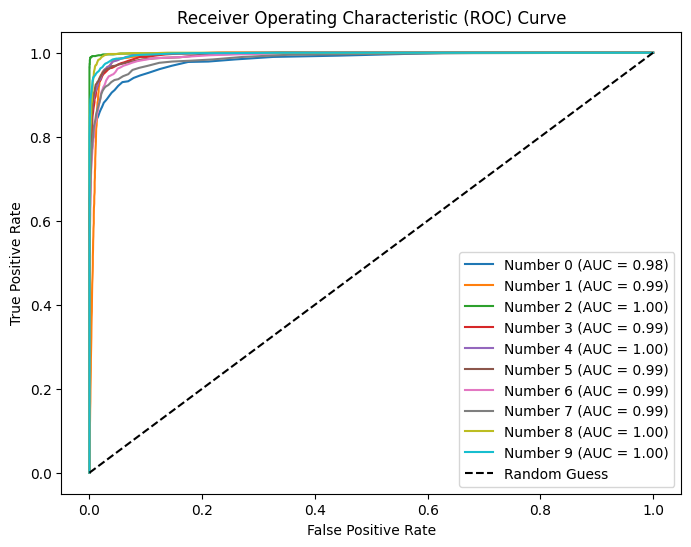

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test_pca)
n_classes = np.unique(y_test)
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(n_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
for i in range(len(n_classes)):
    plt.plot(
        fpr[i], tpr[i],
        label=f'Number {i} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--',label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Experiment with Different Component Sizes

In [ ]:
from sklearn.metrics import classification_report
from time import time

# List of PCA component sizes to try
pca_components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Reshape 3D data to 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Dictionary to store the results
results = {}

# Loop over the PCA component sizes
for n_components in pca_components:

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    pca_var = pca.explained_variance_ratio_
    total_var = pca.explained_variance_ratio_.sum() * 100

    # Train the RandomForestClassifier on the transformed data
    model = RandomForestClassifier()
    start_time = time()
    model.fit(X_train_pca, y_train)
    end_time = time()
    training_time = end_time - start_time

    # Evaluate the model
    y_pred = model.predict(X_test_pca)
    report = classification_report(y_test, y_pred)


    print(f"Report for PCA with {n_components} components:------{model.__class__.__name__}---------")
    print(f'-----------------------------------Training Time: {training_time:.4f} seconds \n')
    print(report)
    print(f'-----------------------------------Total explained variance for {n_components} components-------------Total variance: {total_var:.2f}% ')
    print(f'PCA Explained variance values: \n {pca_var}-----------------------------------\n\n')

    # Store the results
    results[n_components] = {'classification_report': report,'training_time': training_time, 'pca_var': pca_var}


Report for PCA with 5 components:------RandomForestClassifier---------
-----------------------------------Training Time: 22.5498 seconds 

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1000
           1       0.71      0.82      0.76      1000
           2       0.97      0.93      0.95      1000
           3       0.68      0.81      0.74      1000
           4       0.76      0.84      0.80      1000
           5       0.72      0.77      0.75      1000
           6       0.75      0.70      0.72      1000
           7       0.70      0.54      0.61      1000
           8       0.77      0.80      0.78      1000
           9       0.80      0.81      0.80      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

-----------------------------------Total explained variance for 5 components-------------Total varianc

##### Conclusion
we can observe that as the number of PCA components increases beyond a point gain is minimal does not result in performance improvement

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import set_config
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

set_config(display = 'diagram')

# Step 1: Load the Kannada MNIST dataset
data = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")["arr_0"]
label = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")["arr_0"]
# Flatten the image data
data = data.reshape(data.shape[0], -1)
data,label = data[0:5000] , label[0:5000]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=100)

### Build a PIPELINE

In [ ]:
# Define a pipeline
pca = PCA()
scaler = MinMaxScaler()
classifier = RandomForestClassifier()
rfc_pipeline = Pipeline(steps=[ ("scaler", scaler), ("pca", pca),("classifier", classifier)])

In [ ]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA()),
                ('classifier', RandomForestClassifier())])

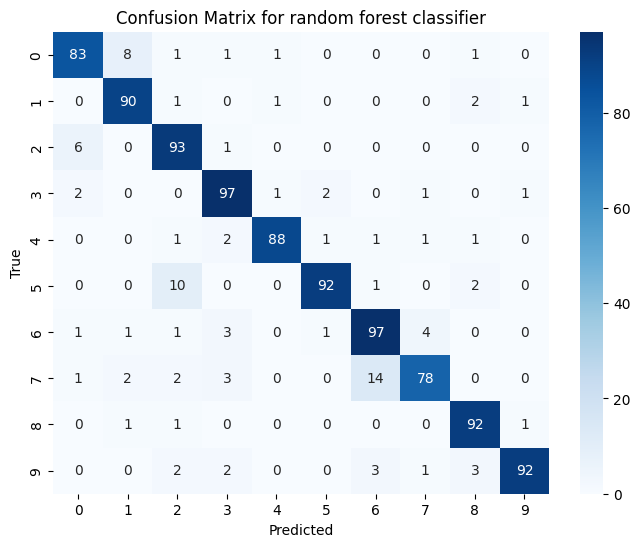

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
y_pred = rfc_pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt="g", cmap="Blues",
    xticklabels=np.unique(y_test), yticklabels=np.unique(y_test)
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for random forest classifier")
plt.show()

In [ ]:
rfc_pipeline.named_steps

{'scaler': MinMaxScaler(),
 'pca': PCA(),
 'classifier': RandomForestClassifier()}

### Evaluate the model

In [ ]:
# Evaluate the model
y_pred = rfc_pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        95
           1       0.88      0.95      0.91        95
           2       0.83      0.93      0.88       100
           3       0.89      0.93      0.91       104
           4       0.97      0.93      0.95        95
           5       0.96      0.88      0.92       105
           6       0.84      0.90      0.87       108
           7       0.92      0.78      0.84       100
           8       0.91      0.97      0.94        95
           9       0.97      0.89      0.93       103

    accuracy                           0.90      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.90      0.90      1000



### Hyperparameter tuning

In [ ]:
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
}
search = GridSearchCV(rfc_pipeline, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.961):
{'classifier__max_depth': 20, 'classifier__n_estimators': 150, 'pca__n_components': 60}


In [ ]:
# Evaluate the model
y_pred = search.predict(X_test)
y_prob = search.predict_proba(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        95
           1       0.92      0.94      0.93        95
           2       0.99      0.90      0.94       100
           3       0.94      0.98      0.96       104
           4       0.94      0.95      0.94        95
           5       0.98      0.99      0.99       105
           6       0.89      0.94      0.91       108
           7       0.95      0.89      0.92       100
           8       0.96      0.97      0.96        95
           9       0.96      0.91      0.94       103

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



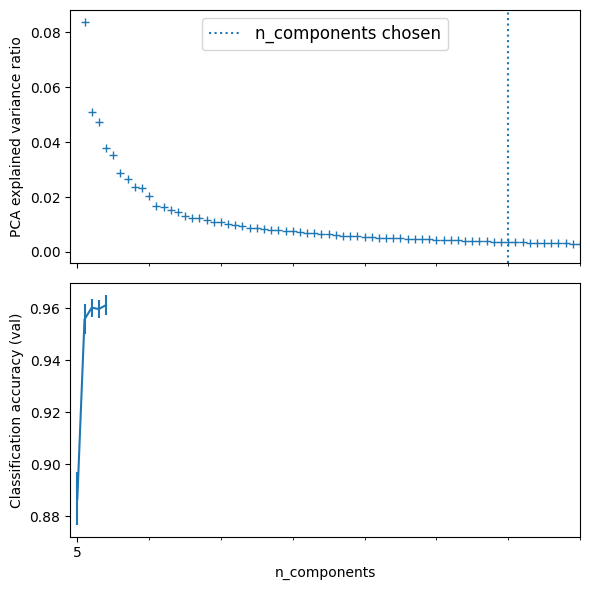

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Plot the PCA spectrum
pca.fit(X_test)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

## Multi Model comparison on Kannada MNIST

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import FunctionTransformer as ft, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pickle
from matplotlib import pyplot as plt
import seaborn as sns


# Load training data
X_train = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")["arr_0"][0:1000]
y_train = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")["arr_0"][0:1000]

# Load testing data
X_test = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz")["arr_0"][0:100]
y_test = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz")["arr_0"][0:100]

# Flatten the image data
def reshape_data(X):
    return X.reshape(X.shape[0], -1)

# Create a transformer from the function
reshaper = ft(reshape_data)

scaler = MinMaxScaler()
pca = PCA()

# Model Selection
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

param_grids = {
    "Decision Trees": {
        "classifier__criterion": ['gini', 'entropy'],
        "classifier__max_depth": [None, 10, 20, 30],
        "preprocessor__pca__n_components": [5, 15, 30, 45, 60],
    },
    "Random Forest": {
        "classifier__n_estimators": [50, 100, 150],
        "classifier__max_depth": [None, 10, 20, 30],
        "preprocessor__pca__n_components": [5, 15, 30, 45, 60],
    },
    "K-Nearest Neighbors": {
        "classifier__n_neighbors": list(range(1, 11)),
        "classifier__weights": ['uniform', 'distance'],
        "preprocessor__pca__n_components": [5, 15, 30, 45, 60],
    },
    "Naive Bayes": {
        "preprocessor__pca__n_components": [5, 15, 30, 45, 60],
    },  # No hyperparameters to tune

    "Support Vector Machine": {
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ['linear', 'rbf'],
        "preprocessor__pca__n_components": [5, 15, 30, 45, 60],
    }
}


grid_searches = {}
results = {}

# Define a pipeline to search for the best combination of PCA truncation
for clf_name, clf in models.items():
    preprocessor = Pipeline(steps=[("reshaper", reshaper), ("scaler", scaler), ("pca", pca)])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

    gs = GridSearchCV(pipeline, param_grids[clf_name], cv=5, n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    grid_searches[clf_name] = gs

    # Store the results in a DataFrame
    results[clf_name] = pd.DataFrame(gs.cv_results_)







Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


##### Best Parameters

In [ ]:
# Print the best parameters and score for each classifier
for clf_name, gs in grid_searches.items():
    best_model = gs.best_estimator_
    print(best_model,'\n')
    print(f"Best parameters for {clf_name}: {gs.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {gs.best_score_:.4f}")

    # Evaluate the models on the test set using the best parameters
    print(f"Test score for {clf_name}: {gs.score(X_test, y_test):.4f}")
    print("--------------\n\n")


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('reshaper',
                                  FunctionTransformer(func=<function reshape_data at 0x793cd83c30a0>)),
                                 ('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=5))])),
                ('classifier', DecisionTreeClassifier(criterion='entropy'))]) 

Best parameters for Decision Trees: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'preprocessor__pca__n_components': 5}
Best cross-validation score for Decision Trees: 0.8850
Test score for Decision Trees: 0.4800
--------------


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('reshaper',
                                  FunctionTransformer(func=<function reshape_data at 0x793cd83c30a0>)),
                                 ('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=45))])),
                ('classifier', RandomForestClas

In [ ]:
#sort by rank_test_score in ascending order
results["Decision Trees"].sort_values(by="rank_test_score", ascending=True).head(5)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
21       0.205521      0.037149         0.006236        0.003106   
20       0.179747      0.005892         0.007419        0.005075   
26       0.117360      0.002490         0.003726        0.000226   
28       0.231627      0.005672         0.004447        0.000349   
1        0.105094      0.009765         0.004144        0.000515   

   param_classifier__criterion param_classifier__max_depth  \
21                     entropy                        None   
20                     entropy                        None   
26                     entropy                          10   
28                     entropy                          10   
1                         gini                        None   

   param_preprocessor__pca__n_components  \
21                                    15   
20                                     5   
26                                    15   
28                                    45   
1                                     15   

                                               params  split0_test_score  \
21  {'classifier__criterion': 'entropy', 'classifi...              0.880   
20  {'classifier__criterion': 'entropy', 'classifi...              0.860   
26  {'classifier__criterion': 'entropy', 'classifi...              0.875   
28  {'classifier__criterion': 'entropy', 'classifi...              0.875   
1   {'classifier__criterion': 'gini', 'classifier_...              0.860   

    split1_test_score  split2_test_score  split3_test_score  \
21              0.930              0.900              0.860   
20              0.915              0.905              0.875   
26              0.935              0.895              0.865   
28              0.925              0.890              0.865   
1               0.900              0.925              0.860   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
21              0.855            0.885        0.027568                1  
20              0.870            0.885        0.021213                1  
26              0.840            0.882        0.031875                3  
28              0.855            0.882        0.024413                3  
1               0.860            0.881        0.026907                5

##### plot the explained variance and acuuracy

In [ ]:

preprocessor.named_steps['pca'] = PCA(n_components=60)

X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted pipeline
X_test_transformed = preprocessor.transform(X_test)

explained_variance_ratio_ = preprocessor.named_steps['pca'].explained_variance_ratio_




In [ ]:


explained_variance_ratio_ =

SyntaxError: invalid syntax (<ipython-input-45-f438afcb918f>, line 1)

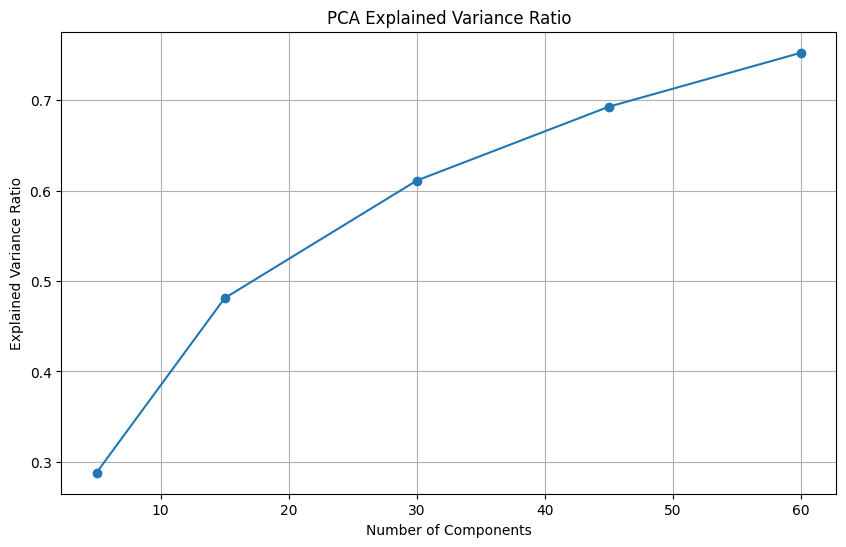

ValueError: X has 60 features, but MinMaxScaler is expecting 784 features as input.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot the explained variance ratio
n_components_values = param_grids['Decision Trees']['preprocessor__pca__n_components']  # Assuming all classifiers have the same param_grid
explained_variance_ratio = []

for n in n_components_values:
    pca.n_components = n
    X_train_transformed = preprocessor.fit_transform(X_train)
    explained_variance_ratio.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(n_components_values, explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

# Plot the classification accuracy for each classifier
plt.figure(figsize=(10, 6))

for clf_name, gs in grid_searches.items():
    best_clf = gs.best_estimator_
    X_test_transformed = preprocessor.transform(X_test)
    y_pred = best_clf.predict(X_test_transformed)
    accuracy = gs.best_score_
    plt.plot(n_components_values, [accuracy]*len(n_components_values), label=f'{clf_name} (Accuracy: {accuracy:.2f})', marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy for Different Number of Components')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for clf_name, gs in grid_searches.items():
    print(clf_name,gs.best_params_['preprocessor__pca__n_components'])

Decision Trees 45
Random Forest 60
Naive Bayes 60
K-Nearest Neighbors 60
Support Vector Machine 45


In [ ]:

results['Decision Trees'].head(10)

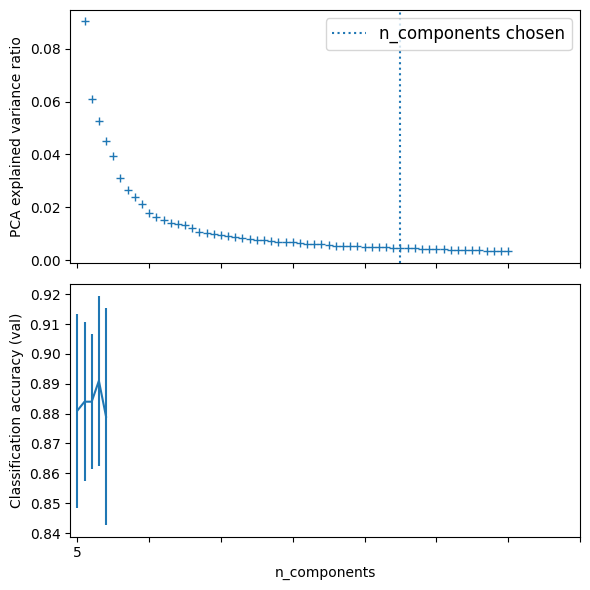

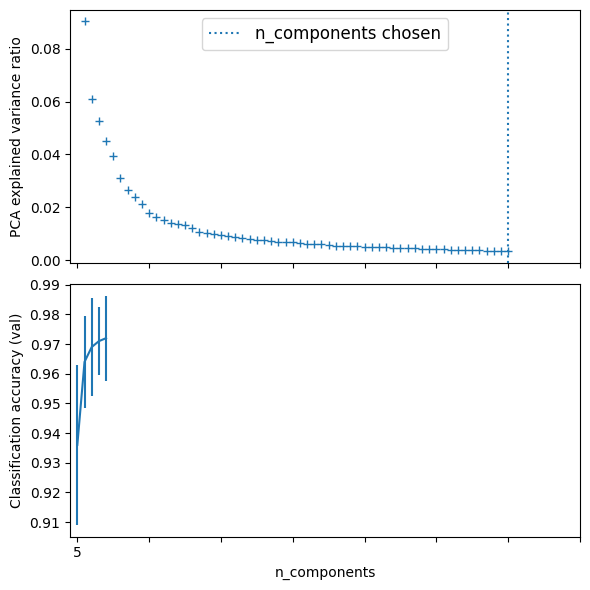

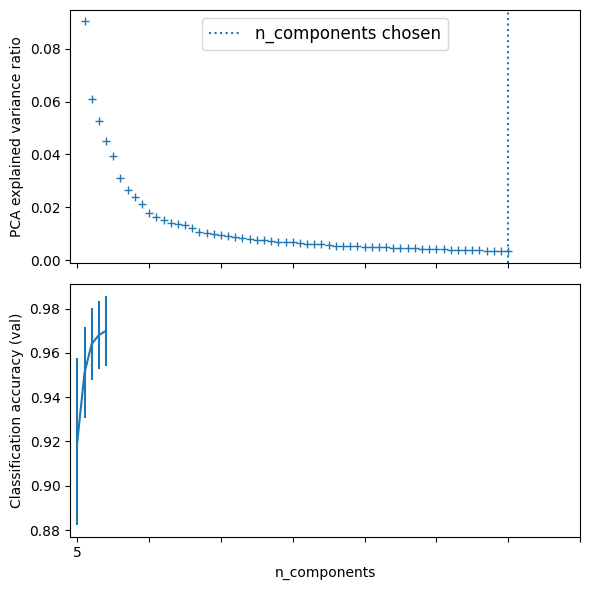

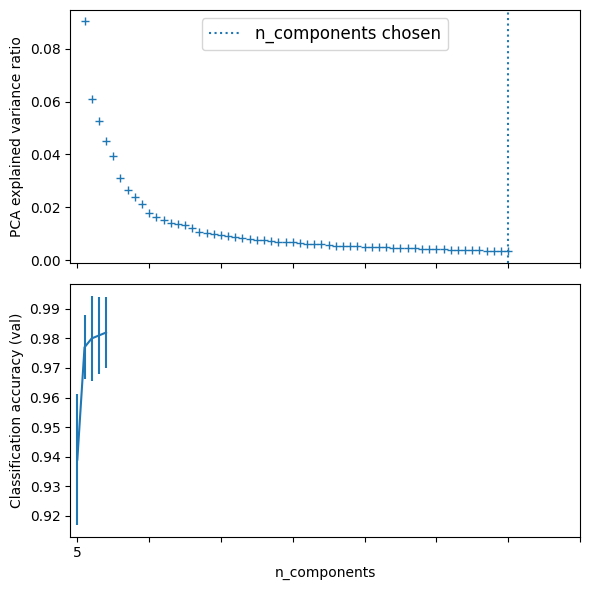

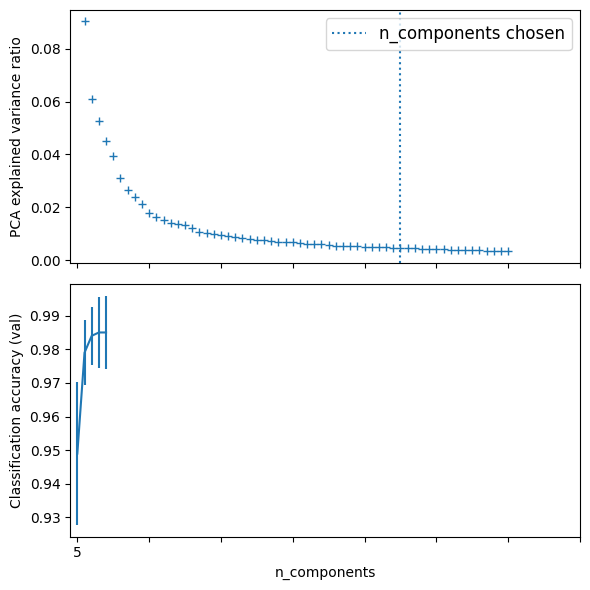

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Plot the PCA spectrum
preprocessor.named_steps['pca'] = PCA(n_components=60)

X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted pipeline
X_test_transformed = preprocessor.transform(X_test)

explained_variance_ratio_ = preprocessor.named_steps['pca'].explained_variance_ratio_
for clf_name, gs in grid_searches.items():
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
    ax0.plot(
        np.arange(1, 60 + 1), explained_variance_ratio_, "+", linewidth=2
    )
    ax0.set_ylabel("PCA explained variance ratio")

    ax0.axvline(
        gs.best_params_['preprocessor__pca__n_components'],
        linestyle=":",
        label="n_components chosen",
    )
    ax0.legend(prop=dict(size=12))

    # For each number of components, find the best classifier results
    data = results[clf_name]
    components_col = "param_preprocessor__pca__n_components"
    best_clfs = data.groupby(components_col).apply(
        lambda g: g.nlargest(1, "mean_test_score")
    )

    best_clfs.plot(
        x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
    )
    ax1.set_ylabel("Classification accuracy (val)")
    ax1.set_xlabel("n_components")

    plt.xlim(-1, 70)

    plt.tight_layout()
    plt.show()

##### Confusion Matrix and ROC-AUC Curve

In [ ]:
for clf_name, gs in grid_searches.items():
    y_prob = gs.predict_proba(X_test)

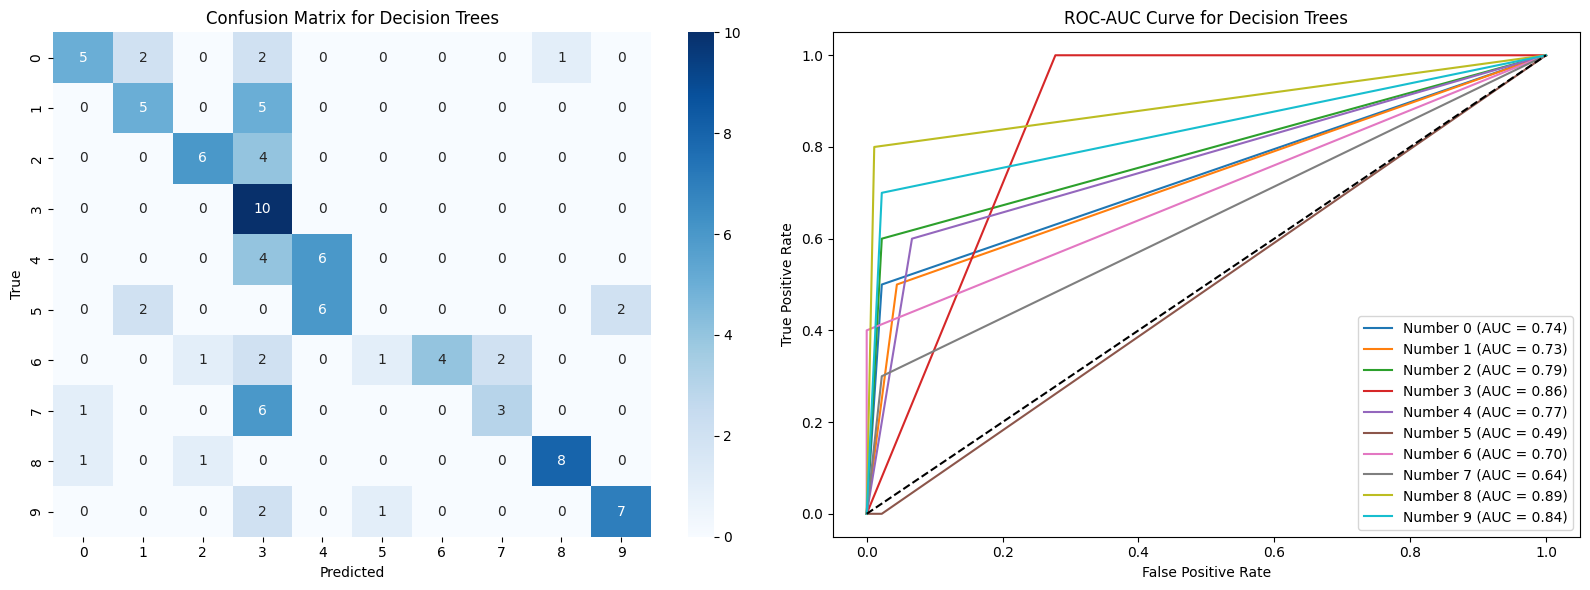

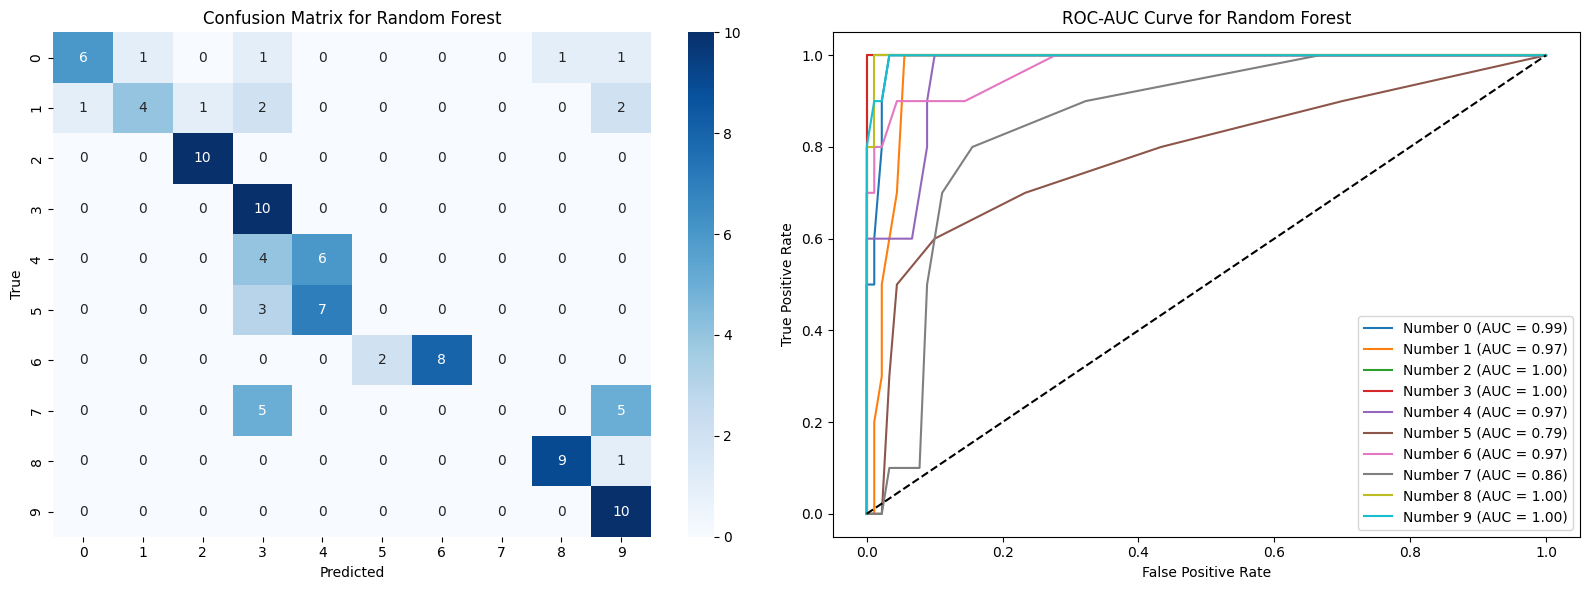

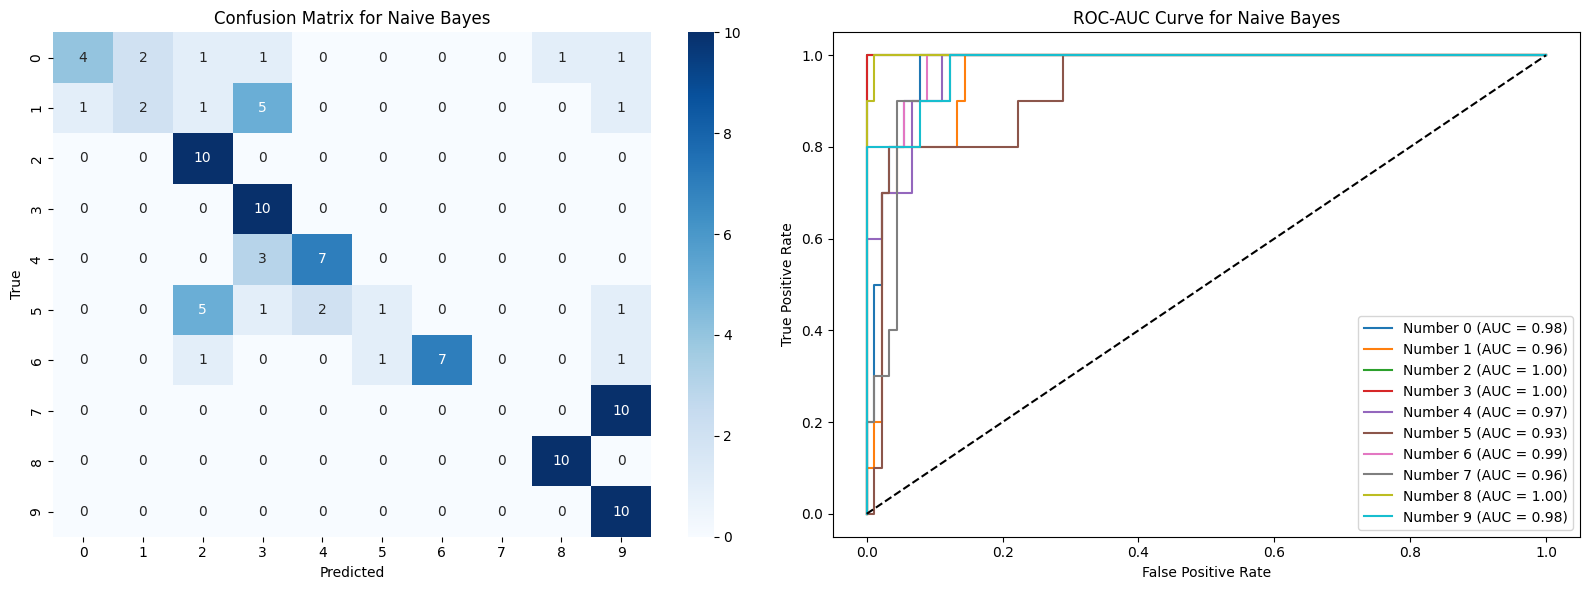

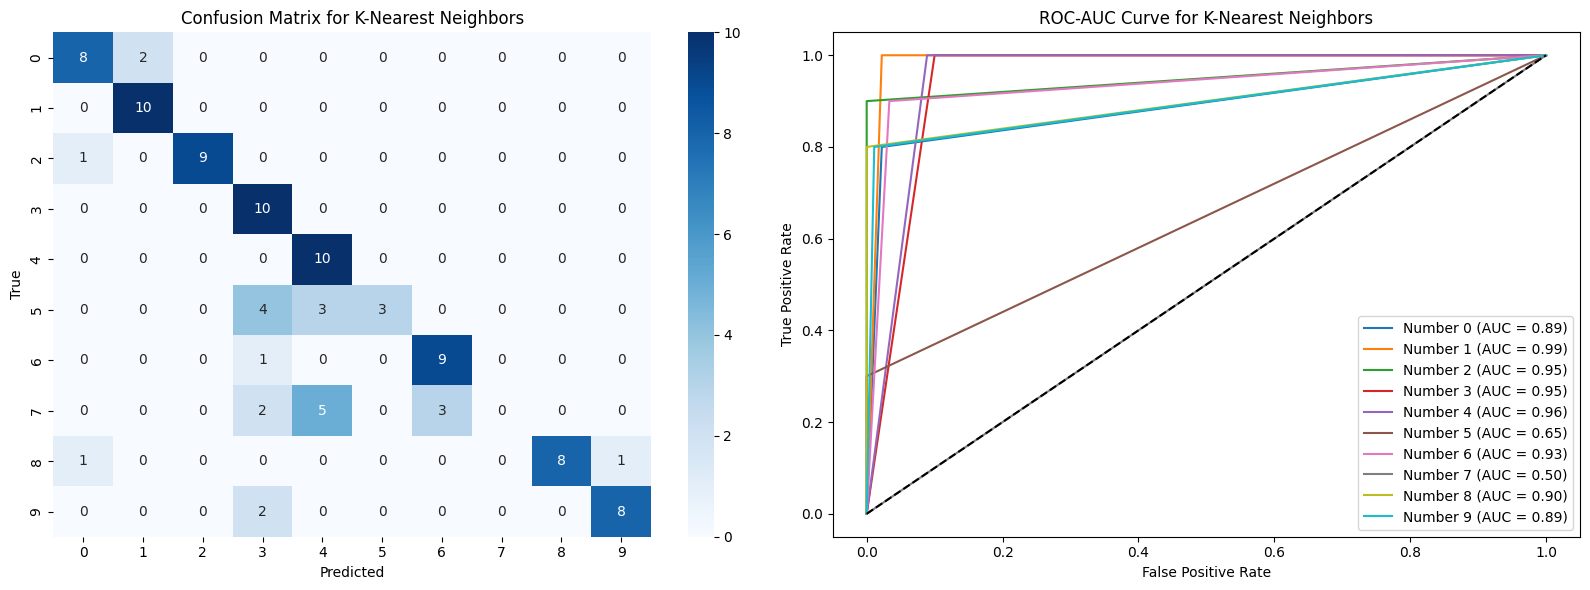

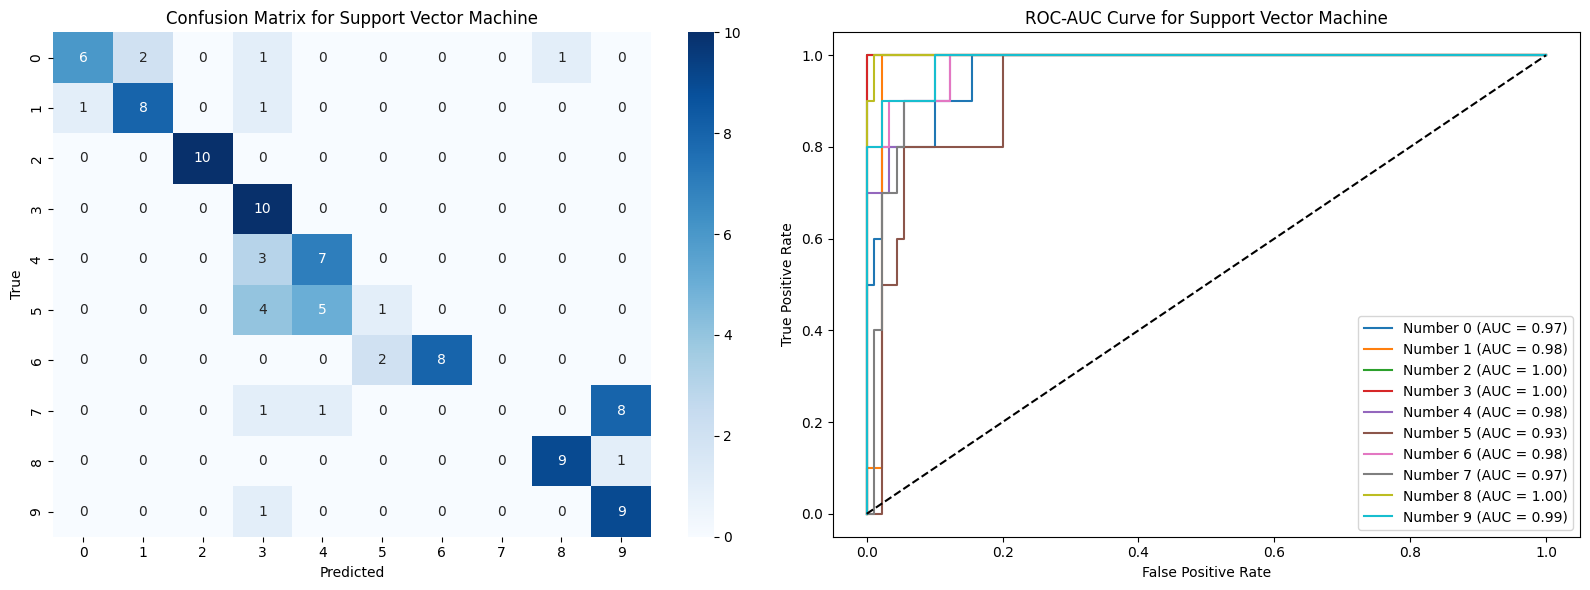

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np

# Display ROC-AUC curves and confusion matrices side by side
for clf_name, gs in grid_searches.items():
    # ROC-AUC Curve
    # Get the predicted probabilities for each class
    y_prob = gs.predict_proba(X_test)
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = np.unique(y_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(n_classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting ROC curve
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 2)
    for i in range(len(n_classes)):
        plt.plot(
            fpr[i], tpr[i],
            label=f'Number {i} (AUC = {roc_auc[i]:.2f})'
        )

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve for {clf_name}')
    plt.legend(loc="lower right")

    # Confusion Matrix
    plt.subplot(1, 2, 1)
    y_pred = gs.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        conf_matrix, annot=True, fmt="g", cmap="Blues",
        xticklabels=np.unique(y_test), yticklabels=np.unique(y_test)
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {clf_name}")

    plt.tight_layout()
    plt.show()
    print('\n\n')


##### Receiver Operating Characteristic on Multi Model

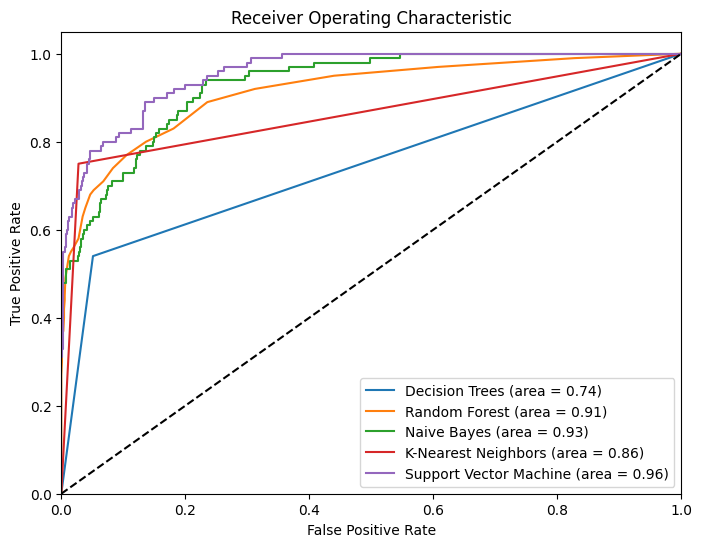

In [ ]:
# Plot ROC curves for each model
n_classes = len(np.unique(y_train))  # Number of unique classes in the training set
plt.figure(figsize=(8, 6))
for clf_name, gs in grid_searches.items():
    # Get the predicted probabilities for each class
    y_prob = gs.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test, classes=[i for i in range(n_classes)]).ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], label=f'{clf_name} (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Final Report production code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load training data
X_train = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")["arr_0"]
y_train = np.load("/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")["arr_0"]

# Flatten the image data
X_train = X_train.reshape(X_train.shape[0], -1)

# Define the pipeline
scaler = MinMaxScaler()
pca = PCA(n_components=60)
svc = SVC(probability=True, C=10, kernel='rbf')

# Create the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('classifier', svc)
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model
joblib.dump(pipeline, 'svc_with_pca.pkl')

['svc_with_pca.pkl']

##### streamlit prediction code

In [ ]:
from pyngrok import ngrok
!ngrok authtoken 2ZjwOwRMWe1xdOQuhwti9eQTXBA_45bBvrKJqeZy7foGQgYWA

# Step 13: Start Streamlit in the background
get_ipython().system_raw('nohup streamlit run /content/streamlit_pred.py &')

# Use ngrok to create a public URL for the Streamlit app
ngrok_tunnel_streamlit = ngrok.connect(addr="8501", proto="http", bind_tls=True)

# Print the public URL for Streamlit app
print("Streamlit app can be accessed at:", ngrok_tunnel_streamlit.public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app can be accessed at: https://f676-34-23-123-175.ngrok-free.app


In [ ]:
import streamlit as st
import numpy as np
import joblib
from PIL import Image

# Load the trained model
model_filename = "/content/svc_with_pca.pkl"
clf = joblib.load(model_filename)

# Define the Streamlit app
def main():
    st.title("Kannada MNIST Classifier")

    # Add a file uploader to upload an image
    image = st.file_uploader("Upload an image of a Kannada digit", type=["png", "jpg"])

    if image is not None:
        # Display the uploaded image
        st.image(image, caption='Uploaded Image.', use_column_width=True)

        # Convert the image file to grayscale and resize it to 28x28 pixels
        image = Image.open(image).convert('L').resize((28, 28))

        # Convert the image to a numpy array and flatten it
        image_array = np.array(image).flatten().reshape(1, -1)

        # Make predictions
        prediction = clf.predict(image_array)

        # Display the prediction
        st.write(f"Prediction: {prediction[0]}")

if __name__ == '__main__':
    main()

2024-06-08 06:23:02.953 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!pkill streamlit